<a href="https://colab.research.google.com/github/LEFT-BEE/AI_KMU/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%8A%A4%ED%84%B0%EB%94%94/Chapter5_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도학습 : 회귀

## 선형 모델

나이 x와 키 t가 세트로 된 데이터를 생각하여 열벡터로 나타 낸다고 생각해보자 이를 통해 지도학습을 하는데 이번에 다룰 주제는 회귀문제이다 회귀는 입력에 대해 연속적인 값을 대응 시키는 문제이다

아래의 코드는 임의의 데이터 x와 t를 생성하는 코드이다 random모듈을 이용해 랜덤하게 생성한다.

In [ ]:
# 리스트 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4 # X의 하한(표시 용)
X_max = 30 # X의 상한(표시 용)
X_n = 16 # X의 상한(표시 용)
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n) # (A)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (B)

In [ ]:
# 리스트 5-1-(2)
print(X)


[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [ ]:
# 리스트 5-1-(3)
print(np.round(X, 2))#소수로 변환


[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [ ]:
# 리스트 5-1-(4)
print(np.round(T, 2))


[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


생성한 데이터는 아래와 같은 코드로 시각화 가능하다 우리는 아래 데이터집합을 가장 잘 표현하는 직선을 찾을 것이다.

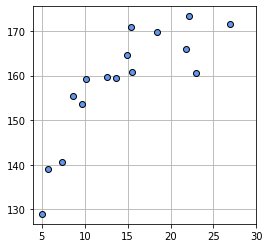

In [ ]:
# 리스트 5-1-(5)
# 데이터 그래프 ------------------------------
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None',
         markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


하지만 우리가 임의로 직선모델을 형성하여도 그 모델이 데이터와 얼마나 부합하는 지는 객관적으로 정량화 해주어야한다 따라서 오차함수를 통해 이를 표현한다. 오차함수의 값이 크면 손실(loss)이 크다는 의미이며 이는 모델이 데이터에 부합하지 않는다는 것을 의미한다 


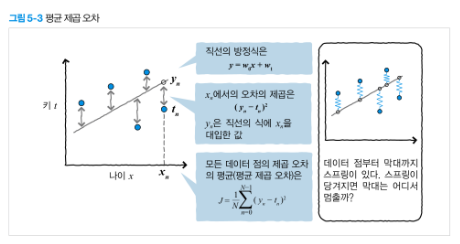

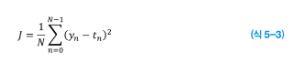

우리는 평균제곱오차(mse)을 정의하여 손실함수를 만들었다 위 식은 mse식이다

그리고 나서 아래 식은 mse를 시각화 하는 코드이다 선형 회귀문제 이므로 convex한 형태를 보인다

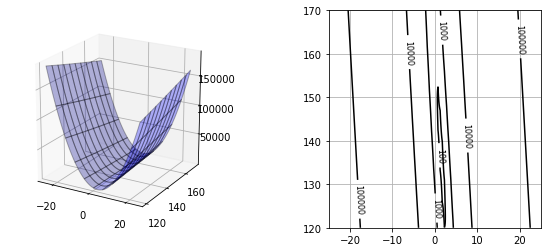

In [ ]:
# 리스트 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D
# 평균 오차 함수 ------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

# 계산 --------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시 --------------------------------------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,
                color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()


그렇다면 손실함수에서 가장 작은 값을 가지는 w_0 와 w_1이 우리가 원하는 데이터를 잘표현하는 직선임을 알 수 있다. 이를 위해서는 경사하강법이라는 방법을 사용한다.


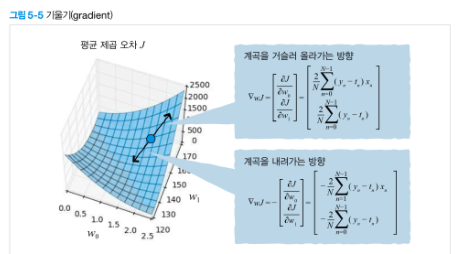

이는 위와 같이 오차함수의 미분값을 통해 알 수 있는데 이때 미분값은 경사하강법의 방향이라고 할 수 있다. 방향에 음수값을 곱해줌으로써 기울기가 향하는 방향의 반대로 향하게 된다.

In [ ]:
# 리스트 5-1-(7)
# 평균 제곱 오차의 기울기 ------------------------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1


In [ ]:
# 리스트 5-1-(8)
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))


[5046.3  301.8]


손실함수의 미분을 정의 하였으므로 실제로 이를 구현하는 코드이다. fit_line_num은 데이터 x,t를 인수로 하여 mse_line을 최소화하는 w를 돌려준다 w는 초기값 w_init에서 시작하여 dmse_line에서 구한 기울기 w를 갱신하고 있다 갱신 단계의 폭이 되는 학습비율은 alpha = 0.001으로 정의 했다.

w가 평평한 곳에 도달하면 (즉 기울기가 충분히 작아지면) w의 갱신을 종료한다 구체적으로는 기울기의 각 요소의 절대 값이 eps = 0.1보다 작으면 for문에서 빠져 나오게 되어있다. 

코드를 실행하면 마지막으로 얻어진 w값 등을 표시하고 w의 갱신내역을 그래프로 표시한다.

반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


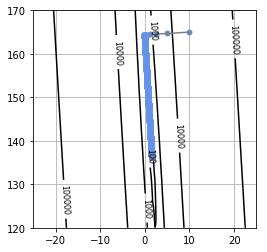

In [ ]:
# 리스트 5-1-(9)
# 구배법 ------------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대치
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i


# 메인 ------------------------------------
plt.figure(figsize=(4, 4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.grid(True)
# 구배법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)
# 결과보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()


위에서 구한 w_0와 w_1을 직선식에 대힙하여 데이터 분포에 겹쳐서 그려본다.

w0=1.540, w1=136.176
SD=7.002 cm


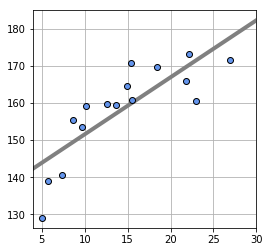

In [ ]:
# 리스트 5-1-(10)
# 선 표시 ----------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)


# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
# mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W) 
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


위 결과는 당연하게도 데이터와 완전히 일치 하지 않는다 이때 오차는 7cm인데 이러한 직관적인 수치를 만들 수 있다.

이를 저 제대로 정의하면 오차가 정규분포를 따른다고 가정했을 때 전체의 68%의 데이터 집합에서 오차가 7cm이하이다 라는 뜻이 된다



방금은 수치해를 통해 미분을 하였지만 머신러닝에서는 될 수 있다면 해석해를 사용하는 것이 더욱 이득이다. 해석해를 도출하면 문제의 본딜을 잘 이해할 수 있고 다차원 데이터에 대응하여 곡선모델로 확장하기 좋다 

해석해를 구하는 과정은 아래와 같이 이루어졌다.


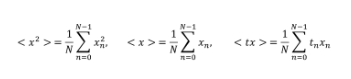

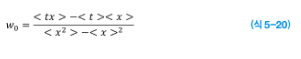

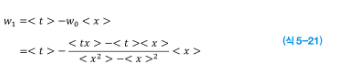

<x^2>은 x^2의 평균임을 주의하자 위는 w의 해석해이다 임력 데이터 x와 목표데이터 T의 값을 이 식에 넣어 w를 찾아보면 확실히 경사하강법과 거의 같은 결과가 얻어진다.

w0=1.558, w1=135.872
SD=7.001 cm


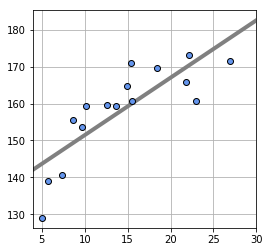

In [ ]:
# 리스트 5-1-(11)
# 해석해 ------------------------------------
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])

# 메인 ------------------------------------
W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


다음은 2차원인 경우에 확장한다 이전과 같이 키와 몸무게 나이의 데이터를 생성한다.

In [ ]:
# 리스트 5-1-(12)
# 2차원 데이터 생성 --------------------------
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1) # 난수를 고정
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [ ]:
# 리스트 5-1-(13)
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))


[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


16명의 데이터가 생성된다 이를 3차원 plot의 그래프를 표시한다

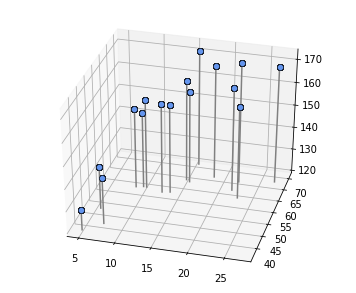

In [ ]:
# 리스트 5-1-(14)
# 2차원 데이터의 표시 ------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()


N개의 2차원 벡터 x_n에 대해 각각 t_n이 할당 되어 있으므로 이 관계를 보려면 다음과 같다.


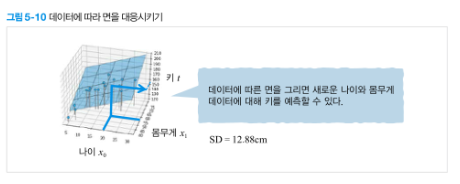

본 모델은 면의 형태를 나타내는데 식이 다음과 같기 떄문이다.
$y(x) = w_0x_0 + w_1x_1 + w_2$

w_0 , w_1 , W_2에 다양한 값을 넣어서 여러 위치와 기울기를 가진 면을 나타낼 수 있다 

SD=12.876 cm


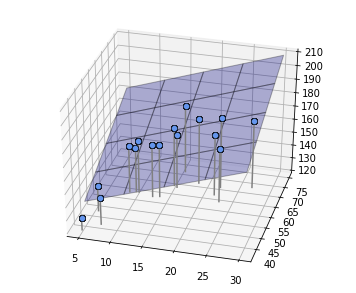

In [ ]:
# 리스트 5-1-(15)
#면의 표시 ----------------------------------
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black') 

#면의 MSE -----------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # (A)
    mse = np.mean((y - t)**2)
    return mse

# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W) 
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


이번에도 가장 적합한 매개변수를 찾기 위해 평균제곱 오차를 정의한다.
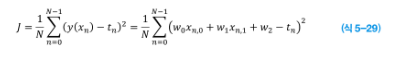



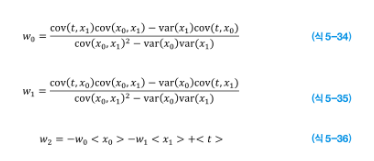

해석해는 위와 같이 구해진다 

아래 코드는 해석해로 구한 면이 데이터 점에 맞게 배치된 것을 알 수 있다.

w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


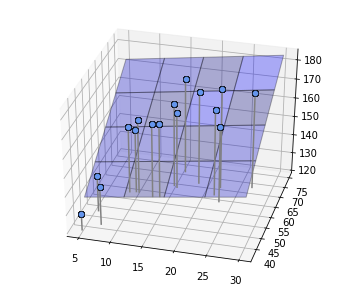

In [ ]:
# 리스트 5-1-(16)
# 해석해 ------------------------------------
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2]) 


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


그렇다면 x가 고차원으로 간다면 어떨까 모든 차원에 대해 모든 공식을 고려한다는 것은 불가능하다 그래서 D차원으로 차원수도 변수로 한 공식을 고려하는 방법을 생각한다.

D차원에서 선형모델은 식 5-37 과 같다

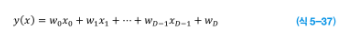



이제부터 다시 해석해를 구하는데 지금까지와 마찬가지로 평균제곱 오차J를 다음과 같이 나타낸다.
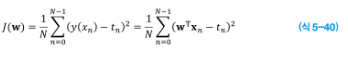

J를 최소로 만드는 w는 모든 w_i방향에 대한 기울기가 0인, 즉 편미분이 0이 되므로 식 5-42는 i=0~D-1에서 성립한다 .

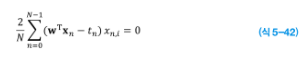

이 D개의 연립 방정식을 각 w_i에 대해 풀면 해답을 얻을 수 있다 여기서 행렬의 차례가 되는데 행렬을 사용하면 D는 D인 채로 답을 구할 수 있다 

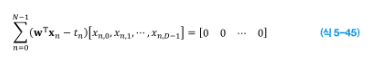

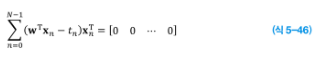

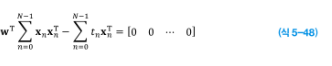

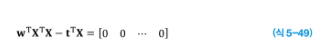

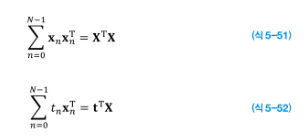

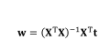



마지막 식은 x가 어떤 차원이라도 모두 이 형태에서 최적의 w를 얻을 수 있다는 결과이다 

## 선형 기저 함수모델

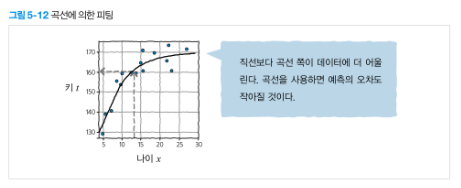

위와 같은 데이터는 완만하게 굽은 곡선이 오차를 더 작게 만든다 곡선모델은 여러 종류가 있지만 여기서는 선형 기저 함수 모델을 소개한다.

우선 가우스 함수를 기저 함수로 선택한 성현 기저함수모델을 생각한다 

기저 함수는 $\phi(x)$와 같이 나타낸다.가우스 함수의 중심위치는 $\mu$이다 이는 모델의 설계자가 결정하는 매개변수가 되고 있다 함수의 확장정도는 s로 조절된다.

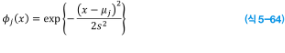

In [ ]:
# --- 리스트 5-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 로드 ----------------------------
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']


In [ ]:
# --- 리스트 5-2-(2)
# 가우스 함수 ---------------------------------
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))


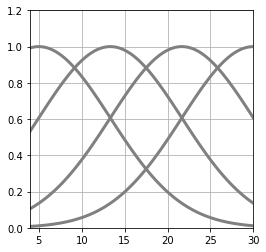

In [ ]:
# 리스트 5-2-(3)
# 메인 ------------------------------------
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0] # (A)
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)

plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()


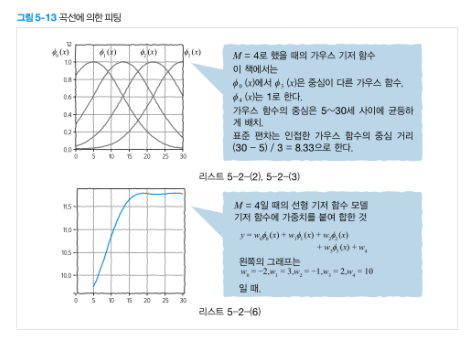

이렇게 저으이된 가우스 함수를 선형모델에 적용시키면 다음과 같다. 

$y(x,w) = w_0\phi_0(x) + w_1\phi_1(x) + w_2\phi_2(x) + w_3\phi_3(x) + w_4$ 

이것이 M=4의 선형 기저 학습 모델이다 매개 변수 W를 가중치 매개 변수하고 한다 마지막 W4는 곡선 상하의 평행 이동을 조절하여 곡선모델이 곱해지지 않는다 하지만 항상 1을 출력하는 더미 기초합수를 추가해 아래와 같이 나타낸다.

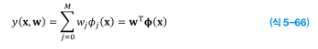

그리고 이에따른 평균 제곱 오차 J는 아래와 같다.

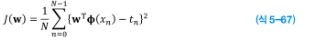

In [ ]:
# 리스트 5-2-(4)
# 선형 기저 함수 모델 ----------------
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y


평균제곱오차를 계산하는 함수 mse_gauss_func을 만들어 주어 피팅의 수준을 산출한다.

In [ ]:
# 리스트 5-2-(5)
# 선형 기저 함수 모델 MSE ----------------
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse


In [ ]:
# 리스트 5-2-(6)
# 선형 기저 함수 모델 정확한 솔루션 -----------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w


선형 기저 함수모델의 피팅결과를 나타낸다 항상 1을 출력하는 더미 함수아 4개의 가우스 기저 함수를 합한 결과이다 데이터에 따라 곡선이 알맞게 그어져있다.

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


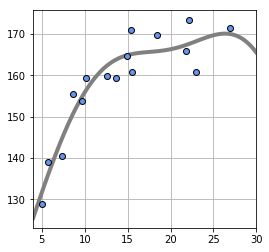

In [ ]:
# 리스트 5-2-(7)
# 가우스 기저 함수 표시 -----------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


# 메인 ----------------------------------
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


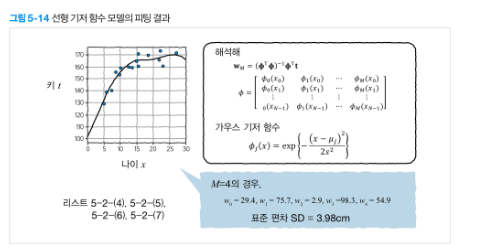

### 오버피팅 문제

이때 기저함수 M은 어떻게 정해야 할까 M을 충분히 크게 하면 문제가 생긴다 결과는 아래와 같다.

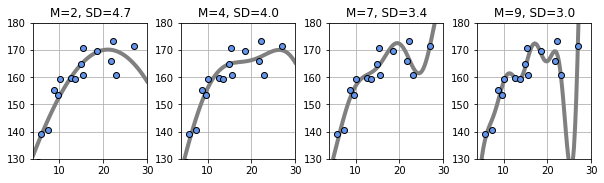

In [ ]:
# 리스트 5-2-(8)
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    
    
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()


M을 무작정 올린다고 좋은 결과가 나타나지는 않는다 

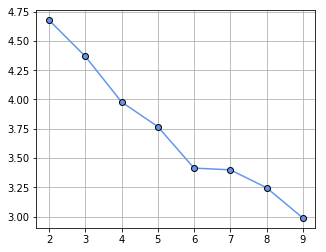

In [ ]:
# 리스트 5-2-(9)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o',
         color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()


M이 증가할수록 선형 기저 함수 몯렝느 작은 곡선도 표현할 수 있게 되므로 곡선은 데이터 점에 근접하게 되고 오차는 점점 감소한다 한편 데이터점이 없는 곳은 평균제곱오차와 관계가 없다 이 때문에 데이터 점이 있는 곳에서 억지로 가늘고 뾰족한 데이터점에 가까워 질려하며 데이터 점이 없는 곳에서는 뒤틀려 버린다.

이러한 현상을 오버피팅이라고 한다 

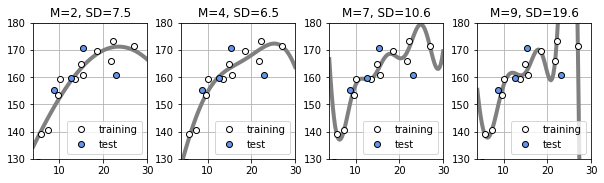

In [ ]:
# 리스트 5-2-(10)
# 훈련 데이터와 테스트 데이터 ------------------
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]
# 메인 ------------------------------------
plt.figure(figsize=(10, 2.5))


plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',
             linestyle='None', color='white',
             markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None',
             color='cornflowerblue',
             markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

M이 4,7,9로 증가함에 따라 곡선은 구부러져 훈련데이터데 접근해간다 그러나 테스트 데이터(파란점)에서는 점점 벗어나는 것처럼 보인다 

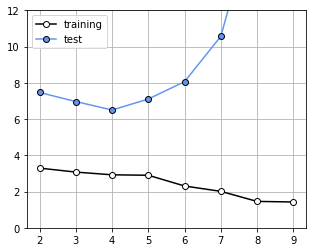

In [ ]:
# 리스트 5-2-(11)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M)) 
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker='o', linestyle='-',
         markerfacecolor='white', markeredgecolor='black',
         color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black',
         label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()


M이 늘어나면 훈련데이터의 오차는 평이하게 감소하지만 테스트 데이터의 오차는 M=5부터 증가한다 즉 이 모델은 M=4일 경우가 가장 데이터에 적합하는 것이 결과이다.

이러한 차이를 최대한 줄이는 교차 검증 방법을 사용한다 다양한 분핧에서 오차를 내고 평균을 게산하는 방법이다 데이터를 분할하는 종류의 개수로 K교차 검증으로 부른다.

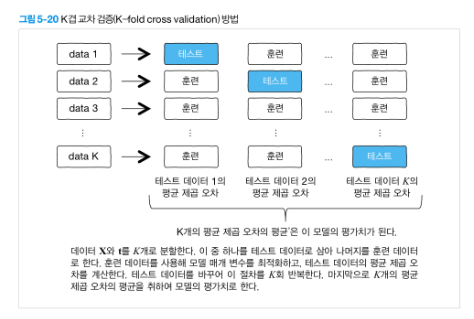

In [ ]:
# 리스트 5-2-(12)
# K 분할 교차 검증 -----------------------------
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i] # (A)
        t_train = t[np.fmod(range(n), k) != i] # (A)
        x_test = x[np.fmod(range(n), k) == i] # (A)
        t_test = t[np.fmod(range(n), k) == i] # (A)
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

In [ ]:
# 리스트 5-2-(13)
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

In [ ]:
# 리스트 5-2-(14)
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782012,  18.30921743,  47.52459642]))

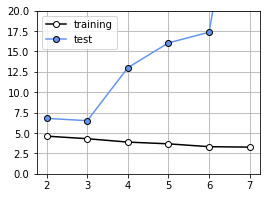

In [ ]:
# 리스트 5-2-(15)
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] =\
                    kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

M=3일때 테스트 데이터의 오차가 가장 작은 것을 알 수 있다 교차 검증은 어디까지나 M을 구하기 위한 방법이며 모델 매개 변수w를 구하는 용도가 아니다. 

M=3일때 선형 기저함수 모델의 피팅은 아래와 같다.

SD=4.37 cm


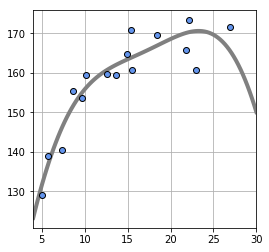

In [ ]:
# 리스트 5-2-(16)
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

이번 테스트데이터 N=16처럼 데이터의 수가 적은 경우에는 교차검증이 유용하다 그러나 데이터 수가 많으면 교차검증은 계산에 시간이 많이 걸린다 이경우에는 홀드 아웃 검증을 사용하면 좋다 

### 새로운 모델의 형성

선형 기저 함수 모델을 도입하여 데이터와의 오차가 많이 개선되었다. 하지만 25세의 그래프가 급격히 내려간다는 점이 문제가 남았다. 

이는 30세 주위의 데이터가 충분하지 않았기 때문에 발생하였다. 키는 나이가 들면서 점차 커지고 일정한 곳에서 수렴한다는 지식을 모델에 추가히기 위해서는

바로 그 지식에 해당하는 모델을  만드렁야한다 이는 아래 수식과 같다.

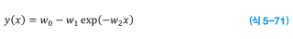

x가 증가하면 exp(-wx)는 0에 접근한다 그 결과 1항의 w_0만 남게 된다 즉 x가 증가하면 y는 w_0에 가까워진다

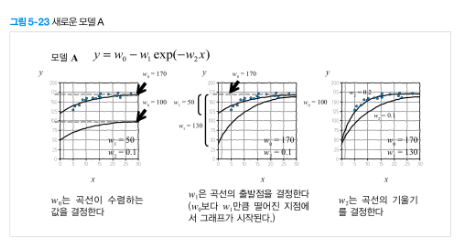

이또한 경사하강법을 위해 제곱오차J가 최소가 되도록 매개변수를 선택해야만 한다.

지금까지 경사하강법을 사용하여 수치적으로 w를 구하는 방법과 해석적으로 도출하는 방법을 소개 하였다 여기에는 전자의 수치해석의 라이브러리를 사용하여 찾아본다


파이썬의 scipy.optimzier에 포함된 minimize함수를 사용하여 최적의 매개변수를 구해본다.

모델을 model_A로 정의하고 표시용함수 show_model(w)와
mse를 출력하는 함수 mse_model(w,x,t)를 정의한디

In [ ]:
# 리스트 5-2-(17)
# 모델 A -----------------------------------
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y 


# 모델 A 표시 -------------------------------
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


# 모델 A의 MSE ------------------------------
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t)**2)
    return mse

In [ ]:
# 리스트 5-2-(18)
from scipy.optimize import minimize 


# 모델 A의 매개 변수 최적화 -----------------
def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res1.x

결과는 아래와 같은데 직선 모델 때의 오차보다 훨씬 적으며 M=3의 선형 기저 함수모델에 비해서도 낮은 값이 된다. 

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


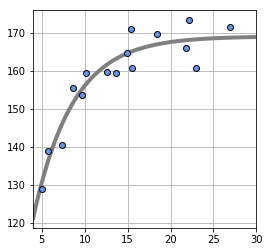

In [ ]:
# 리스트 5-2-(19)
# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


### 모델의 선택

지금까지 새로운 모델을 만들어 매개변수를 최적화하여 데이터에 피팅하였다 히지만 마무리 작업이 남았는데 어떤 모델이 더 좋을지 모델간의 비굔느 어떻게 하는 것일까 

모델간의 비교에도 선형기저 함수의 모델 M을 결정할때와 같은 생각인 미지의 데이터애 대한 예측정확도로 평가한다는 방식이 유효하다

즉 홀드아웃검증과 교차 검증모델로 모델의 좋고 나쁨을 평가한다.

다음 코드는 모델 A의 검증을 실시하여 나타낸 성형 기저 함수의 모델과 비교한다.

Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


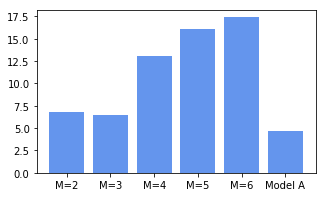

In [ ]:
# 리스트 5-2-(20)
# 교차 검증 model_A ---------------------------
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test


# 메인 ------------------------------------
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center",
facecolor="cornflowerblue")
plt.show()


세롭게 생각한 model Aㅡ이 테스트 데이터에 대한 오차는 가장 작다 즉 제일 데이터에 잘 어울린다.

## 정리

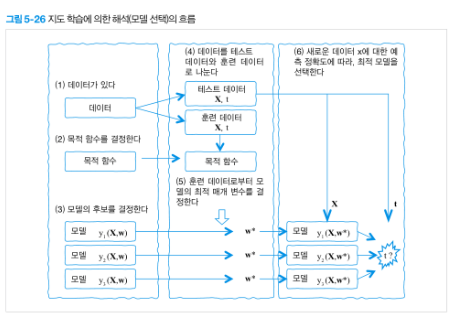